## Model Training
- 1.1 Import Data and Required Packages
-Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [54]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [55]:
df =  pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X,Y variable

In [56]:
X= df.drop(columns='math_score')
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [57]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [58]:
y=df.iloc[:,-3]  ## df['math_score]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [59]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [60]:
# Creating Columns Transformer With 3 Type of Transformer 

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [61]:
X = preprocessor.fit_transform(X)

In [62]:
X.shape

(1000, 19)

In [63]:
# Split the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluate function to give all metrics after trainig

In [64]:
def evaluate_model(true,predicted):
    mse= mean_squared_error(true,predicted)
    mae= mean_absolute_error(true,predicted)
    rmse= np.sqrt(mse)
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [65]:
# Building the model

models = {
    "LinearRegression": LinearRegression(),
    "Lasso" : Lasso(),
    'Ridge' : Ridge(),
    "KNeighborsRegressor" :KNeighborsRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor' :XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train,y_train)

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Model Performace for training set")
    print('-Root Mean Squared Error :{:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error :{:.4f}'.format(model_train_mae))
    print('-R2 score :{:.4f}'.format(model_train_r2))

    print('--------------------------------------------')

    print("Model Performace for test")
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))


    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

LinearRegression
Model Performace for training set
-Root Mean Squared Error :5.3243
- Mean Absolute Error :4.2671
-R2 score :0.8743
--------------------------------------------
Model Performace for test
Model performance for Test set
- Root Mean Squared Error: 5.3959
- Mean Absolute Error: 4.2153
- R2 Score: 0.8803


Lasso
Model Performace for training set
-Root Mean Squared Error :6.5938
- Mean Absolute Error :5.2063
-R2 score :0.8071
--------------------------------------------
Model Performace for test
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performace for training set
-Root Mean Squared Error :5.3233
- Mean Absolute Error :4.2650
-R2 score :0.8743
--------------------------------------------
Model Performace for test
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor
Model Performace for training set
-Root Mean 

### Result

In [69]:
df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

# Sorting the DataFrame by 'R2_Score' in descending order
df_sorted = df.sort_values(by='R2_Score', ascending=False)

In [70]:
df_sorted

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880348
4,RandomForestRegressor,0.854682
6,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.842657
5,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813


### Linear Regression

In [72]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred =lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is {score:.2f}")

Accuracy of the model is 88.03


### plot y_pred and y_test

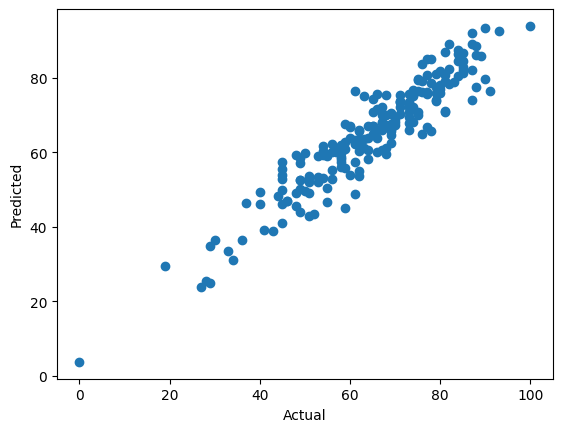

In [73]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<Axes: xlabel='math_score'>

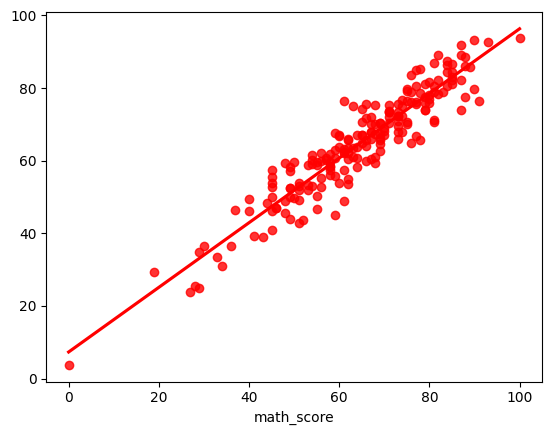

In [74]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

### Difference Between Actual and Predicted values


In [75]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted,Difference
521,91,76.507812,14.492188
737,53,58.937500,-5.937500
740,80,76.953125,3.046875
660,74,76.750000,-2.750000
411,84,87.523438,-3.523438
...,...,...,...
408,52,43.539062,8.460938
332,62,62.023438,-0.023438
208,74,67.968750,6.031250
613,65,67.125000,-2.125000
